<a href="https://colab.research.google.com/github/davemkhitaryan/NN-Semester-Project/blob/main/NN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisites

In [1]:
pip install tensorflow

In [2]:
import random
import numpy as np
import tensorflow as tf
from numpy import array
import keras
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from keras.utils.vis_utils import plot_model

In [ ]:
#@test {"output": "ignore"}
print('Installing dependencies...')
!apt-get update -qq && apt-get install -qq libfluidsynth1 fluid-soundfont-gm build-essential libasound2-dev libjack-dev
!pip install -qU pyfluidsynth pretty_midi

!pip install -qU magenta

# Hack to allow python to pick up the newly-installed fluidsynth lib. 
# This is only needed for the hosted Colab environment.
import ctypes.util
orig_ctypes_util_find_library = ctypes.util.find_library
def proxy_find_library(lib):
  if lib == 'fluidsynth':
    return 'libfluidsynth.so.1'
  else:
    return orig_ctypes_util_find_library(lib)
ctypes.util.find_library = proxy_find_library

print('Importing libraries and defining some helper functions...')
from google.colab import files

import magenta
import note_seq
import tensorflow

print('🎉 Done!')
print(magenta.__version__)
print(tensorflow.__version__)

# The Training and Testing Data
In the cells below we create the training and testing data. Including dividing the songs into both categories.

In [4]:
#generate simplified version
def simplify_song(song):
  simplified_song = []
  for i in range(len(song)):
    #bar = []
    for j in range(8):
      if song[i][j] == 2:
        #bar.append(1)
        simplified_song.append(1)
      else:
        #bar.append(0)
        simplified_song.append(0)

    #simplified_song.append(bar)
  return simplified_song  


In [ ]:
#Chorus of Under Pressure by Queen
#We also took the kick/bass drum here
queen_under_pressure = []

queen_under_pressure.append([2,2,2,2,2,2,2,2])#28
queen_under_pressure.append([2,2,2,2,2,2,2,2])
queen_under_pressure.append([2,2,2,2,2,2,2,2])
queen_under_pressure.append([2,2,2,2,2,2,2,2])
queen_under_pressure.append([2,2,2,2,2,2,2,2])
queen_under_pressure.append([2,2,2,2,2,2,0,2])
queen_under_pressure.append([2,0,0,0,0,0,0,0])
queen_under_pressure.append([2,1,1,2,0,0,0,0])

print(queen_under_pressure)

queen_up_simplified = simplify_song(queen_under_pressure)
queen_up_simplified = np.array(queen_up_simplified)
print(queen_up_simplified)
file = open('training_data/queen_up.txt', 'w')
file.write(str(queen_up_simplified))
file.close()

In [ ]:

#8 eight-notes in one bar
# 2 means the note is hit, 1 means it's still playing (to represent half and quart notes), 0 means nothing is played
#we represent this by the kick/bass drum
#Chorus of Bon jovi it's my life
bon_jovi__its_my_life = []

#chorus
bon_jovi__its_my_life.append([2,0,0,0,2,0,0,0])
bon_jovi__its_my_life.append([2,0,0,0,2,0,0,0])
bon_jovi__its_my_life.append([2,0,0,0,2,0,0,0])
bon_jovi__its_my_life.append([2,0,0,0,2,0,0,0])
bon_jovi__its_my_life.append([2,0,0,0,2,0,0,0])
bon_jovi__its_my_life.append([2,0,0,0,2,2,0,0])
bon_jovi__its_my_life.append([2,0,0,0,2,0,0,0])
bon_jovi__its_my_life.append([2,0,0,0,2,2,0,0])
bon_jovi__its_my_life.append([2,0,0,0,2,0,0,0])
bon_jovi__its_my_life.append([2,0,0,0,2,0,0,0])
bon_jovi__its_my_life.append([2,0,0,0,2,0,0,0])
bon_jovi__its_my_life.append([2,0,0,0,2,0,0,0])
bon_jovi__its_my_life.append([2,0,0,0,2,0,0,0])
bon_jovi__its_my_life.append([2,0,0,0,2,2,0,0])
bon_jovi__its_my_life.append([2,0,0,0,2,0,0,0])
bon_jovi__its_my_life.append([2,0,0,0,2,2,0,0])

print(bon_jovi__its_my_life)

bj_iml_updated = simplify_song(bon_jovi__its_my_life)
bj_iml_updated = np.array(bj_iml_updated)
print(bj_iml_updated)
file = open('training_data/bj_iml.txt', 'w')
file.write(str(bj_iml_updated))
file.close()

In [ ]:
#Chorus of eye of the tiger by survivor
survivor_eyeofthetiger = []
survivor_eyeofthetiger.append([2,0,2,0,2,0,2,0])
survivor_eyeofthetiger.append([2,0,2,0,2,0,2,0])
survivor_eyeofthetiger.append([2,0,2,0,2,0,2,0])
survivor_eyeofthetiger.append([2,0,2,0,2,0,2,0])
survivor_eyeofthetiger.append([2,0,2,0,2,0,2,0])
survivor_eyeofthetiger.append([2,0,2,0,2,0,2,0])
survivor_eyeofthetiger.append([2,0,2,0,2,0,2,0])
survivor_eyeofthetiger.append([1,0,1,0,2,1,0,0])
survivor_eyeofthetiger.append([2,1,2,1,2,1,2,1])
survivor_eyeofthetiger.append([2,1,2,1,2,1,2,0])
survivor_eyeofthetiger.append([2,0,2,0,2,0,2,0])
survivor_eyeofthetiger.append([2,0,2,0,2,0,2,0])

eyeofthetiger_simplified = simplify_song(survivor_eyeofthetiger)
eyeofthetiger_simplified = np.array(eyeofthetiger_simplified)
print(eyeofthetiger_simplified)
file = open('training_data/survivor_eott.txt', 'w')
file.write(str(eyeofthetiger_simplified))
file.close()

In [10]:
#Chorus of R U Mine? by arctic monkeys
arctic_rumine = []
arctic_rumine.append([2,2,0,2,0,2,0,2])
arctic_rumine.append([2,2,0,2,0,2,0,2])
arctic_rumine.append([2,0,2,2,2,2,0,2])
arctic_rumine.append([0,2,0,2,2,2,0,0])
arctic_rumine.append([2,0,2,0,0,0,0,0])
arctic_rumine.append([2,2,0,2,0,2,0,2])
arctic_rumine.append([2,2,0,2,0,2,0,2])
arctic_rumine.append([2,2,0,2,0,2,0,2])
arctic_rumine.append([2,2,0,2,0,2,0,2])
arctic_rumine.append([2,2,0,0,0,0,0,0])
arctic_rumine.append([2,2,0,2,0,2,0,2])
arctic_rumine.append([2,2,0,2,0,0,0,0])
arctic_rumine.append([2,2,0,2,0,2,0,2])
arctic_rumine.append([2,2,0,2,1,1,2,0])

arctic_rumine_simplified = simplify_song(arctic_rumine)
arctic_rumine_simplified = np.array(arctic_rumine_simplified)
file = open('training_data/arctic_rumine.txt', 'w')
file.write(str(arctic_rumine_simplified))
file.close()

In [11]:
#Chorus of the take over, the breaks over by fall out boy
fob_takeover_breaksover = []
fob_takeover_breaksover.append([2,1,0,2,0,2,0,0])
fob_takeover_breaksover.append([2,2,0,0,2,1,0,0])
fob_takeover_breaksover.append([2,1,0,2,0,2,0,0])
fob_takeover_breaksover.append([2,2,0,0,0,0,0,0])

fob_takeover_breaksover.append([2,1,0,2,0,2,0,0])
fob_takeover_breaksover.append([2,2,0,0,2,1,0,0])
fob_takeover_breaksover.append([2,1,0,2,0,2,0,0])
fob_takeover_breaksover.append([2,2,0,2,0,0,0,2])

fob_takeover_breaksover.append([2,0,0,2,0,2,0,2])
fob_takeover_breaksover.append([2,2,0,2,2,0,2,1])
fob_takeover_breaksover.append([2,0,0,2,0,2,0,2])
fob_takeover_breaksover.append([2,2,0,2,0,0,0,0])
fob_takeover_breaksover.append([0,2,0,2,2,1,0,0])

fob_takeover_breaksover_simplified = simplify_song(fob_takeover_breaksover)
fob_takeover_breaksover_simplified = np.array(fob_takeover_breaksover_simplified)
file = open('training_data/fob_totbo.txt', 'w')
file.write(str(fob_takeover_breaksover_simplified))
file.close()

In [12]:
#Chorus of this is how you remind me by Nickelback
nickelback_tihyrm = []
nickelback_tihyrm.append([2,1,0,0,2,2,0,0])
nickelback_tihyrm.append([2,1,0,0,2,2,0,0])
nickelback_tihyrm.append([2,1,0,0,2,2,0,0])
nickelback_tihyrm.append([2,1,0,0,2,2,0,0])

nickelback_tihyrm.append([2,2,0,0,2,2,0,0])
nickelback_tihyrm.append([2,1,0,0,2,2,0,0])
nickelback_tihyrm.append([2,1,0,0,2,2,0,0])
nickelback_tihyrm.append([2,0,2,0,2,2,0,2])

nickelback_tihyrm.append([2,1,0,0,2,2,0,0])
nickelback_tihyrm.append([2,1,0,0,2,2,0,2])
nickelback_tihyrm.append([2,1,0,0,2,2,0,0])
nickelback_tihyrm.append([2,2,0,0,2,2,2,2]) #this one was difficult to translate

nickelback_tihyrm_simplified = simplify_song(nickelback_tihyrm)
nickelback_tihyrm_simplified = np.array(nickelback_tihyrm_simplified)
file = open('training_data/nickelback_tihyrm.txt', 'w')
file.write(str(nickelback_tihyrm_simplified))
file.close()

In [13]:
# chorus of Mr. Brightside by The Killers
killers_brightside = []
killers_brightside.append([2,0,0,0,2,0,0,2])
killers_brightside.append([2,0,0,0,2,0,0,0])
killers_brightside.append([2,0,0,0,2,0,0,0])
killers_brightside.append([2,0,0,0,2,0,0,2])
killers_brightside.append([2,0,0,0,2,0,0,0])
killers_brightside.append([2,0,0,0,2,0,0,0])
killers_brightside.append([2,0,0,0,2,0,0,2])
killers_brightside.append([2,0,0,0,2,0,0,2])
# repeat once
killers_brightside.append([2,0,0,0,2,0,0,2])
killers_brightside.append([2,0,0,0,2,0,0,0])
killers_brightside.append([2,0,0,0,2,0,0,0])
killers_brightside.append([2,0,0,0,2,0,0,2])
killers_brightside.append([2,0,0,0,2,0,0,0])
killers_brightside.append([2,0,0,0,2,0,0,0])
killers_brightside.append([2,0,0,0,2,0,0,2])
killers_brightside.append([2,0,0,0,2,0,0,2])

brightside_simplified = simplify_song(killers_brightside)
brightside_simplified = np.array(brightside_simplified)
file = open('training_data/killers_brighside.txt', 'w')
file.write(str(brightside_simplified))
file.close()

In [ ]:
# Chorus of Summer of 69 by Bryan Adams
brian_adams_summer_69 = []
brian_adams_summer_69.append([2,0,0,0,0,0,0,2])
brian_adams_summer_69.append([2,0,0,0,2,0,0,2])
brian_adams_summer_69.append([2,0,0,0,0,0,0,2])
brian_adams_summer_69.append([2,0,0,0,2,0,0,2])
brian_adams_summer_69.append([2,0,0,0,0,0,0,2])
brian_adams_summer_69.append([2,0,0,0,2,0,0,2])
brian_adams_summer_69.append([2,0,0,0,0,0,0,2])
brian_adams_summer_69.append([2,0,0,0,2,0,0,2])
brian_adams_summer_69.append([2,0,0,0,0,0,0,2])
brian_adams_summer_69.append([2,0,0,0,2,0,0,2])

brian_adams_summer_69.append([2,0,0,0,0,0,0,2])
brian_adams_summer_69.append([2,0,0,0,2,0,0,0])
brian_adams_summer_69.append([2,0,0,0,0,0,0,2])
brian_adams_summer_69.append([2,1,0,0,0,0,0,0])

brian_adams_summer_69.append([2,0,0,0,2,0,0,0])
brian_adams_summer_69.append([2,0,0,0,2,2,0,0])
brian_adams_summer_69.append([2,0,0,0,2,0,0,0])
brian_adams_summer_69.append([2,0,2,0,2,0,2,0])

summer_69_simplified = simplify_song(brian_adams_summer_69)
summer_69_simplified = np.array(summer_69_simplified)
print(summer_69_simplified)
file = open('training_data/ba_s69.txt', 'w')
file.write(str(summer_69_simplified))
file.close()

In [ ]:
# Chorus of Smells Like Teenspirit by Nirvana
# any notes that were 16ths are incooporated as 8th notes
nirvana_smells_like_teenspirit = []
for i in range(11):
  nirvana_smells_like_teenspirit.append([2,2,0,0,2,2,0,2])
nirvana_smells_like_teenspirit.append([2,2,0,2,0,2,0,2])

nirvana_slts_simplified = simplify_song(nirvana_smells_like_teenspirit)
nirvana_slts_simplified = np.array(nirvana_slts_simplified)
print(nirvana_slts_simplified)
file = open('training_data/nirvana_slts.txt', 'w')
file.write(str(nirvana_slts_simplified))
file.close()

In [ ]:
# Chorus of Highway to Hell by AC/DC
ACDC_highway_to_hell = []
ACDC_highway_to_hell.append([2,0,0,0,2,0,0,2])
ACDC_highway_to_hell.append([2,0,0,0,2,1,0,0])
ACDC_highway_to_hell.append([2,0,0,0,2,0,0,2])
ACDC_highway_to_hell.append([2,0,0,0,2,1,0,0])
ACDC_highway_to_hell.append([2,0,0,0,2,0,0,2])
ACDC_highway_to_hell.append([2,0,0,0,2,1,0,0])
ACDC_highway_to_hell.append([2,0,0,0,2,0,0,2])
ACDC_highway_to_hell.append([2,0,0,0,2,1,0,0])
ACDC_highway_to_hell.append([2,0,0,0,2,0,0,2])
ACDC_highway_to_hell.append([2,0,0,0,2,1,0,0])
ACDC_highway_to_hell.append([2,0,0,0,2,0,0,0])
ACDC_highway_to_hell.append([0,0,0,0,0,0,0,0])
ACDC_highway_to_hell.append([0,0,0,0,0,0,0,2])

ACDC_hth_simplified = simplify_song(ACDC_highway_to_hell)
ACDC_hth_simplified = np.array(ACDC_hth_simplified)
print(ACDC_hth_simplified)
file = open('training_data/ACDC_hth.txt', 'w')
file.write(str(ACDC_hth_simplified))
file.close()

In [17]:
real_dataset = []
inputs = []
outputs = []

real_dataset.extend(bj_iml_updated)
real_dataset.extend(queen_up_simplified)
real_dataset.extend(eyeofthetiger_simplified)
real_dataset.extend(arctic_rumine_simplified)
real_dataset.extend(fob_takeover_breaksover_simplified)
real_dataset.extend(nickelback_tihyrm_simplified)
real_dataset.extend(brightside_simplified)
real_dataset.extend(summer_69_simplified)
real_dataset.extend(nirvana_slts_simplified)
real_dataset.extend(ACDC_hth_simplified)

real_dataset = np.array(real_dataset)
real_dataset = np.reshape(real_dataset, (134, 8))

X_train = []
X_test =[]
Y_train = []
Y_test = []

# The testing and training data isn't split between songs, 
# but rather summer of 69 is partly in both the testing and the training data
# Because this is an extended lab exercise and many sequences are repeating, 
# we favoured having a nice percentual division between the training and 
# testing data over putting whole songs in it.
X_train = real_dataset[0:102]
Y_train = real_dataset[1:103]
X_test = real_dataset[103:133]
Y_test = real_dataset[104:134]

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(102, 8) (102, 8) (30, 8) (30, 8)


#The Network:
Below we define the network architecture, we have 2 hidden layers of each 128 neurons, the input and output layer are both 8 neurons.

In [18]:
# Fix the seed to ensure the results are replicable
np.random.seed(24)
tf.random.set_seed(24)

# Initialize the MLP model
model = keras.models.Sequential()

# The input layer, with the number of neurons is equal to the number
# of data in X_train NumPy array (namely 8)
model.add(
    keras.layers.Dense(
    name='InputLayer',
    units=128,
    input_dim=X_train.shape[1],           # This gives 8
    kernel_initializer='glorot_uniform',  # defines how to initialise the weights  
    # the regularization argument, minimizes Wx+b by adjusting W and b
    activity_regularizer=tf.keras.regularizers.L1(1e-4),
    bias_initializer='zeros',
    activation='tanh') 
)
# Hidden layer 1 with 128 neurons
model.add(
    keras.layers.Dense(
    name='HiddenLayer1',
    units=128,
    input_dim=128,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    activity_regularizer=tf.keras.regularizers.L1(1e-4),
    activation='tanh')
)
# Hidden layer 2 with 128 neurons
model.add(
    keras.layers.Dense(
    name='HiddenLayer2',
    units=128,
    input_dim=128,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    activity_regularizer=tf.keras.regularizers.L1(1e-4),
    activation='tanh')
)

# Add an output layer. The number of output layer neurons is equal to the number
# of data in Y_train NumPy array (namely 8)
model.add(
    keras.layers.Dense(
    name='OutputLayer',
    units=Y_train.shape[1],
    input_dim=128,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    activation='tanh')
)

# Define Stochastic Gradient Descent optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.005, momentum=0.3)
# Compile model use Mean Square Error loss
model.compile(optimizer=optimizer, loss='mse', metrics=["accuracy", "mse"])
# Train model (4000 epochs,each epoch model is tested on validation dataset.
# Verbose=2 allows to see extra details for each epoch, 0 hides all progress.)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),  epochs=4000, verbose=0)


# Generating the Results
Below we generate the results and test them with our testing data.

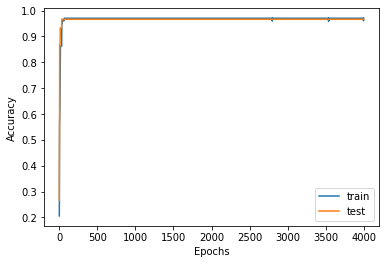

[[1. 0. 0. 1. 1. 1. 0. 1.]]
[[1. 1. 0. 0. 1. 0. 0. 0.]]
[[1. 0. 0. 1. 0. 1. 0. 0.]]
[[1. 1. 0. 1. 1. 0. 0. 0.]]
[[1. 1. 0. 1. 0. 1. 0. 0.]]
[[1. 1. 0. 1. 0. 1. 0. 0.]]
[[1. 1. 0. 1. 0. 1. 0. 0.]]
[[1. 1. 0. 1. 0. 1. 0. 0.]]
[1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.]


In [23]:
import matplotlib.scale

generator = X_test[11]
generator = np.expand_dims(generator, axis=0)
generatedDrum = generator

pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.show()

np.set_printoptions(precision=2)
for i in range(8):
  output = model.predict(generator, verbose=0)
  output[output <= 0.5] = 0
  output[output > 0.5] = 1
  print(output)
  
  generatedDrum = np.append(generatedDrum, output)
  generator = generatedDrum[-8:]
  generator = np.expand_dims(generator, axis=0)
  
print(generatedDrum)

In [ ]:
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [24]:
from note_seq.protobuf import music_pb2
np.random.seed(24)
drums = music_pb2.NoteSequence()
for i in range(0, len(generatedDrum)):
  if i%8 == 0:
    pitch_choice = 38
  else: 
    pitch_choice = 36
  if generatedDrum[i] != 0:
    drums.notes.add(pitch=pitch_choice, start_time=0.27*i, end_time=(0.27*(i+1)), is_drum=True, instrument=10, velocity=110)

drums.total_time = 0.27*len(generatedDrum)

drums.tempos.add(qpm=90)

# This is a Magenta utility method that plays a NoteSequence.
note_seq.play_sequence(drums,synth=note_seq.fluidsynth)

# Extra

Below we do some extra analysis of the data, e.g., finding fixed points in the NN.

In [25]:
# This is a Magenta utility method that visualizes a NoteSequence.
note_seq.plot_sequence(drums)

In [ ]:
def runNetwork(generator,length):
  generator = np.expand_dims(generator, axis=0)
  generatedDrum = generator
  np.set_printoptions(precision=2)
  for i in range(length):
    output = model.predict(generator, verbose=0)
  
    output[output <= 0.5] = 0
    output[output > 0.5] = 1
    
    generatedDrum = np.append(generatedDrum, output)
    generator = generatedDrum[-8:]
    generator = np.expand_dims(generator, axis=0)
  if length == 1:
    return generator
  return generatedDrum

In [ ]:
file = open('fixed_points.txt', 'w')
unconverging_points = []
attractors = []
fixed_points = 0
fixed_points_list = []
for a in range(2):
  for b in range(2):
    for c in range(2):
      for d in range(2):
        for e in range(2):
          for f in range(2):
            for g in range(2):
              for h in range(2):
                new_result = runNetwork([a,b,c,d,e,f,g,h],1)
                result = np.expand_dims([a,b,c,d,e,f,g,h], axis=0)
                iterations = 0
                while not np.array_equal(new_result,result):
                  result = new_result
                  if iterations == 100:
                    unconverging_points.append([a,b,c,d,e,f,g,h])
                    break
                  iterations += 1
                  new_result = runNetwork(result[0],1)  
                if iterations<100:
                  print("After ", iterations, " iterations ", [a,b,c,d,e,f,g,h], " ended up in fixed point ", new_result[0])
                  attractors.append(new_result[0])
                  fixed_points_list.append(new_result[0])
                  file.write("After " + str(iterations) + " iterations " + str([a,b,c,d,e,f,g,h])+ " ended up in fixed point "+ str(new_result[0]) +'\n')
                #if np.array_equal(np.expand_dims([a,b,c,d,e,f,g,h], axis=0),result):
                #  print("Fixed point:" , [a,b,c,d,e,f,g,h], ' | ', result[0])
                #  fixed_points+=1
                #else:
                #  print("Not a fixed point: ", [a,b,c,d,e,f,g,h], ' | ', result[0])
#print("The number of fixed points is: ", fixed_points)
for point in unconverging_points:
  print("No fixed point in 100 iterations for: ", point)
  file.write("No fixed point in 100 iterations for: "+ str(point) + '\n')
  result = runNetwork(point,10)
  print(result)
  results_string = ""
  for i in range(len(result)):
    if i % 8 == 0:
      results_string += "| "
    results_string += str(result[i]) + " "
  print(results_string)
  file.write(results_string + '\n')
file.close()
print(len(unconverging_points))

In [ ]:
print(str(attractors))

In [ ]:
#print(str(fixed_points_list))
#here we consider each bar as a binary code, which we store in its decimal representation
histogram = np.zeros(pow(2,8))
test = []
for point in fixed_points_list:
  point_value = 0
  
  for i in range(len(point)):
    point_value += point[i]*pow(2,(len(point)-i-1))
  
  histogram[int(point_value)] +=1
  test.append(point_value)
#print(histogram)
fig, ax = pyplot.subplots(figsize =(10, 7))
ax.hist(test, bins = list(range(120,260)))
pyplot.xlabel("Decimal representation of the bars")
pyplot.ylabel("Number of times a sequence of bars converges to the bar")
plt.show()

# found on https://www.geeksforgeeks.org/python-program-to-covert-decimal-to-binary-number/
def decimalToBinary(n):
    return bin(n).replace("0b", "")

i = 0
for x in histogram:
  if x != 0:
    print("point "+str(decimalToBinary(i))+ " occurred "+ str(x) + " times.")
  i+=1